In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df=pd.read_csv("Classified Data", index_col=0)

In [3]:
df.head(10)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
5,0.833928,1.523302,1.104743,1.021139,1.107377,1.010930,1.279538,1.280677,0.510350,1.528044,0
6,0.944705,1.251761,1.074885,0.286473,0.996440,0.428860,0.910805,0.755305,1.111800,1.110842,0
7,0.816174,1.088392,0.895343,0.243860,0.943123,1.045131,1.146536,1.341886,1.225324,1.425784,0
8,0.776551,1.463812,0.783825,0.337278,0.742215,1.072756,0.880300,1.312951,1.118165,1.225922,0
9,0.772280,0.515111,0.891596,0.940862,1.430568,0.885876,1.205231,0.596858,1.542580,0.981879,1


In [4]:
df.describe(include="all")

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [6]:
X=df.drop("TARGET CLASS",axis=1)

In [7]:
y=df["TARGET CLASS"]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [9]:
kneigh=KNeighborsClassifier(n_neighbors=12)

In [10]:
kneigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [11]:
y_pred=kneigh.predict(x_test)

In [12]:
accuracy_score(y_test,y_pred)

0.9266666666666666

### Plotting ElbowCurve

In [13]:
error = []
for i in range(1,20):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    error.append(1-accuracy_score(y_test,y_pred))

In [14]:
error

[0.09666666666666668,
 0.1233333333333333,
 0.08999999999999997,
 0.07999999999999996,
 0.08666666666666667,
 0.08333333333333337,
 0.08666666666666667,
 0.07999999999999996,
 0.07999999999999996,
 0.07666666666666666,
 0.07666666666666666,
 0.07333333333333336,
 0.07666666666666666,
 0.07333333333333336,
 0.06666666666666665,
 0.06999999999999995,
 0.07999999999999996,
 0.07333333333333336,
 0.07666666666666666]

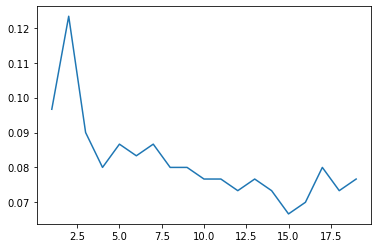

In [15]:
plt.plot(range(1,20),error)

### Stratified KFoldCV

In [16]:
skf=StratifiedKFold(n_splits=10)

In [17]:
skf.get_n_splits(X=X,y=y)

10

In [18]:
knn=KNeighborsClassifier()

In [19]:
accuracy = []
for train_index, test_index in skf.split(X,y):
    #Print('Train', 'train_index', 'Test = test_index')
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] #Fetching
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

In [20]:
accuracy

[0.91, 0.95, 0.91, 0.93, 0.88, 0.92, 0.94, 0.94, 0.96, 0.96]

In [21]:
np.mean(accuracy)

0.93

### Hyperparameter Tuning using GridSearchCV

In [22]:
params={"n_neighbors":[10,20,30,40,50,80,150],"weights":["uniform"],"algorithm":["brute","ball_tree"]}

In [23]:
gcv = GridSearchCV(estimator=knn, param_grid=params, cv=10)

In [24]:
gcv.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['brute', 'ball_tree'],
                         'n_neighbors': [10, 20, 30, 40, 50, 80, 150],
                         'weights': ['uniform']})

In [25]:
gcv.best_params_

{'algorithm': 'brute', 'n_neighbors': 40, 'weights': 'uniform'}

In [26]:
KNN = KNeighborsClassifier(n_neighbors= 40, weights='uniform', algorithm = 'auto')

In [27]:
accuracy = []
for train_index, test_index in skf.split(X,y):
    #Print('Train', 'train_index', 'Test = test_index')
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] #Fetching
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

In [28]:
np.mean(accuracy)

0.9410000000000002

https://github.com/dalwindr/AV_ML_Notebooks/blob/master/AV_BigData%20Mart%20Sales%20Regression.ipynb

https://github.com/krishnaik06